# Is the PCSO Lottery Fair?

---
- Author: Majella Imperial
- Github: https://github.com/singjellarity
- Created: November 2023

---

In this project, I'm going to study the PCSO Lottery and see if it is fair and if there is a way to "predict" the winning lotto numbers.

## Introduction
The Philippine Charity Sweepstakes Office (PCSO) regularly posts the lottery results on their website at https://www.pcso.gov.ph/

There are different types of lottery games available for anyone of legal age to play, however we're going to focus on the following 6 digit lottery games:
- Lotto 6/42
- Mega Lotto 6/45
- Super Lotto 6/49
- Grand Lotto 6/55
- Ultra Lotto 6/58

Please take note that all of these games require 6 numbers to play, but the succeeding numbers are the pool of numbers one can choose from. Therefore, you can play 1 to 42 in Lotto 6/42, and 1 to 45 in Mega Lotto, etc.

PCSO draws the winning numbers everyday at 9 PM. Below is a schedule of the evening draws.
| Sunday | Monday | Tuesday | Wednesday | Thursday | Friday | Saturday|
|---|---|---|---|---|---|---|
| Ultra Lotto 6/58 | Grand Lotto 6/55 | Ultra Lotto 6/58 | Grand Lotto 6/55 | Super Lotto 6/49 | Ultra Lotto 6/58 | Grand Lotto 6/55 |
| Super Lotto 6/49 | Mega Lotto 6/45 | Super Lotto 6/49 | Mega Lotto 6/45 | Lotto 6/42 | Mega Lotto 6/45 | Lotto 6/42 |
| | | Lotto 6/42 | | | | |

The ticket price to join the lottery and the initial jackpot is listed below. The jackpot grows whenever there is no jackpot winner.

| Game | Ticket Price | Initial Jackpot|
|---|---|---|
|Lotto 6/42 | PHP 20.00 | PHP 5,940,000.00 |
|Mega Lotto 6/45| PHP 20.00 | PHP 8,910,000.00 |
|Super Lotto 6/49 | PHP 20.00 | PHP 15,840,000.00 |
|Grand Lotto 6/55| PHP 20.00 | PHP 29,700,000.00 |
|Ultra Lotto 6/58 | PHP 20.00 | PHP 49,500,000.00|

The Draw Procedure is done with strict guidelines. There is also a panel of judges not connected with the PCSO and representatives from the Commission on Audit overseeing the process to ensure that protocol is followed. 

The balls where the winning numbers are printed on are regularly inspected, measured for its weight, and stored inside briefcases for safety. The blowing machine used is also inspected before each game to ensure fairness. 

## Objective
The purpose of this study is to:
- Learn what's the highest and lowest amount won by a player.
- Determine the highest number of winning players. 
- Determine if the PCSO Lottery is fair.
- Know when is the best day to play and which game to join.
- List the 12 best numbers to play in the game.

## Prepare the Data

First, let's import the required libraries.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

We're going to extract the lottery results from PCSO's website at: https://www.pcso.gov.ph/SearchLottoResult.aspx

In [2]:
data= pd.read_csv('AllResults.csv')
data.head()

,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT,WINNERS
0,Ultra Lotto 6/58,11-37-44-33-13-28,10/22/2023,57271281.8,0
1,Superlotto 6/49,13-08-38-44-31-11,10/22/2023,15840000.0,0
2,3D Lotto 2PM,39208,10/22/2023,4500.0,354
3,3D Lotto 5PM,6 04 2006,10/22/2023,4500.0,180
4,3D Lotto 9PM,7 04 2003,10/22/2023,4500.0,327


Because we extracted the data from the PCSO website using the "All Games" dropdown selection, the dataset includes results from PCSO's other lotto games. Let's filter the dataset to only show the 6 digit lottery games that we will use.

In [3]:
#list the games we need in a dataframe
games=['Ultra Lotto 6/58','Superlotto 6/49','Grand Lotto 6/55','Lotto 6/42','Megalotto 6/45']

## select the rows based on the listed names in games
filtered_data= data.loc[data['LOTTO GAME'].isin(games)]
filtered_data

,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT,WINNERS
0,Ultra Lotto 6/58,11-37-44-33-13-28,10/22/2023,57271281.8,0
1,Superlotto 6/49,13-08-38-44-31-11,10/22/2023,15840000.0,0
8,Grand Lotto 6/55,04-42-44-49-39-21,10/21/2023,42610676.0,0
9,Lotto 6/42,03-22-02-17-14-39,10/21/2023,15027455.6,0
17,Ultra Lotto 6/58,25-54-48-50-37-29,10/20/2023,52222306.8,0
...,...,...,...,...,...
33150,Megalotto 6/45,19-28-09-33-34-45,1 04 2013,8509962.6,0
33158,Superlotto 6/49,23-11-25-18-09-03,1 03 2013,16000000.0,1
33164,Lotto 6/42,21-27-23-37-39-08,1 03 2013,6808330.8,0
33167,Megalotto 6/45,06-08-38-44-41-01,1 02 2013,4500000.0,0


Let's view the column types to see what else needs processing.

In [4]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7639 entries, 0 to 33175
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LOTTO GAME    7639 non-null   object 
 1   COMBINATIONS  7639 non-null   object 
 2   DRAW DATE     7639 non-null   object 
 3   JACKPOT       7639 non-null   float64
 4   WINNERS       7639 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 358.1+ KB


Because one of our objectives is to determine the best day of the week to play the lottery, let's convert the **DRAW DATE** column into a date time and add a column that will indicate which day of the week it is. 

In [5]:
from datetime import date
import calendar

## convert Draw Date to a date time 
filtered_data['DRAW DATE']=pd.to_datetime(filtered_data['DRAW DATE'])

## create a column for the day of the week
filtered_data['DAY']=filtered_data['DRAW DATE'].dt.strftime('%A')

filtered_data.head()

C:\Users\Jell\AppData\Local\Temp\ipykernel_9324\43302869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DRAW DATE']=pd.to_datetime(filtered_data['DRAW DATE'])
C:\Users\Jell\AppData\Local\Temp\ipykernel_9324\43302869.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DAY']=filtered_data['DRAW DATE'].dt.strftime('%A')


,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT,WINNERS,DAY
0,Ultra Lotto 6/58,11-37-44-33-13-28,2023-10-22,57271281.8,0,Sunday
1,Superlotto 6/49,13-08-38-44-31-11,2023-10-22,15840000.0,0,Sunday
8,Grand Lotto 6/55,04-42-44-49-39-21,2023-10-21,42610676.0,0,Saturday
9,Lotto 6/42,03-22-02-17-14-39,2023-10-21,15027455.6,0,Saturday
17,Ultra Lotto 6/58,25-54-48-50-37-29,2023-10-20,52222306.8,0,Friday


In [6]:
filtered_data['DAY'] = filtered_data['DAY'].astype('string')
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7639 entries, 0 to 33175
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   LOTTO GAME    7639 non-null   object        
 1   COMBINATIONS  7639 non-null   object        
 2   DRAW DATE     7639 non-null   datetime64[ns]
 3   JACKPOT       7639 non-null   float64       
 4   WINNERS       7639 non-null   int64         
 5   DAY           7639 non-null   string        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2), string(1)
memory usage: 417.8+ KB


C:\Users\Jell\AppData\Local\Temp\ipykernel_9324\4172535331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DAY'] = filtered_data['DAY'].astype('string')


Now that we've cleaned up a little, let's focus on the **COMBINATIONS** column. Every winning number is separated by a dash. Let's split the column and create individual columns for the numbers.

In [7]:
filtered_data['BALL 1'] = filtered_data['COMBINATIONS'].str.split('-').str[0].astype(int)
filtered_data['BALL 2'] = filtered_data['COMBINATIONS'].str.split('-').str[1].astype(int)
filtered_data['BALL 3'] = filtered_data['COMBINATIONS'].str.split('-').str[2].astype(int)
filtered_data['BALL 4'] = filtered_data['COMBINATIONS'].str.split('-').str[3].astype(int)
filtered_data['BALL 5'] = filtered_data['COMBINATIONS'].str.split('-').str[4].astype(int)
filtered_data['BALL 6'] = filtered_data['COMBINATIONS'].str.split('-').str[5].astype(int)
filtered_data.head()

C:\Users\Jell\AppData\Local\Temp\ipykernel_9324\4128418806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['BALL 1'] = filtered_data['COMBINATIONS'].str.split('-').str[0].astype(int)
C:\Users\Jell\AppData\Local\Temp\ipykernel_9324\4128418806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['BALL 2'] = filtered_data['COMBINATIONS'].str.split('-').str[1].astype(int)
C:\Users\Jell\AppData\Local\Temp\ipykernel_9324\4128418806.py:3: SettingWithCopyWarning: 
A value is trying to

,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT,WINNERS,DAY,BALL 1,BALL 2,BALL 3,BALL 4,BALL 5,BALL 6
0,Ultra Lotto 6/58,11-37-44-33-13-28,2023-10-22,57271281.8,0,Sunday,11,37,44,33,13,28
1,Superlotto 6/49,13-08-38-44-31-11,2023-10-22,15840000.0,0,Sunday,13,8,38,44,31,11
8,Grand Lotto 6/55,04-42-44-49-39-21,2023-10-21,42610676.0,0,Saturday,4,42,44,49,39,21
9,Lotto 6/42,03-22-02-17-14-39,2023-10-21,15027455.6,0,Saturday,3,22,2,17,14,39
17,Ultra Lotto 6/58,25-54-48-50-37-29,2023-10-20,52222306.8,0,Friday,25,54,48,50,37,29


We can now drop the **COMBINATIONS** column. 

In [8]:
filtered_data.drop('COMBINATIONS', axis=1, inplace=True)
filtered_data

C:\Users\Jell\AppData\Local\Temp\ipykernel_9324\2633485785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop('COMBINATIONS', axis=1, inplace=True)


,LOTTO GAME,DRAW DATE,JACKPOT,WINNERS,DAY,BALL 1,BALL 2,BALL 3,BALL 4,BALL 5,BALL 6
0,Ultra Lotto 6/58,2023-10-22,57271281.8,0,Sunday,11,37,44,33,13,28
1,Superlotto 6/49,2023-10-22,15840000.0,0,Sunday,13,8,38,44,31,11
8,Grand Lotto 6/55,2023-10-21,42610676.0,0,Saturday,4,42,44,49,39,21
9,Lotto 6/42,2023-10-21,15027455.6,0,Saturday,3,22,2,17,14,39
17,Ultra Lotto 6/58,2023-10-20,52222306.8,0,Friday,25,54,48,50,37,29
...,...,...,...,...,...,...,...,...,...,...,...
33150,Megalotto 6/45,2013-01-04,8509962.6,0,Friday,19,28,9,33,34,45
33158,Superlotto 6/49,2013-01-03,16000000.0,1,Thursday,23,11,25,18,9,3
33164,Lotto 6/42,2013-01-03,6808330.8,0,Thursday,21,27,23,37,39,8
33167,Megalotto 6/45,2013-01-02,4500000.0,0,Wednesday,6,8,38,44,41,1


Now let's check for any missing data and drop any rows that might contain no values.

In [9]:
filtered_data.dropna()

,LOTTO GAME,DRAW DATE,JACKPOT,WINNERS,DAY,BALL 1,BALL 2,BALL 3,BALL 4,BALL 5,BALL 6
0,Ultra Lotto 6/58,2023-10-22,57271281.8,0,Sunday,11,37,44,33,13,28
1,Superlotto 6/49,2023-10-22,15840000.0,0,Sunday,13,8,38,44,31,11
8,Grand Lotto 6/55,2023-10-21,42610676.0,0,Saturday,4,42,44,49,39,21
9,Lotto 6/42,2023-10-21,15027455.6,0,Saturday,3,22,2,17,14,39
17,Ultra Lotto 6/58,2023-10-20,52222306.8,0,Friday,25,54,48,50,37,29
...,...,...,...,...,...,...,...,...,...,...,...
33150,Megalotto 6/45,2013-01-04,8509962.6,0,Friday,19,28,9,33,34,45
33158,Superlotto 6/49,2013-01-03,16000000.0,1,Thursday,23,11,25,18,9,3
33164,Lotto 6/42,2013-01-03,6808330.8,0,Thursday,21,27,23,37,39,8
33167,Megalotto 6/45,2013-01-02,4500000.0,0,Wednesday,6,8,38,44,41,1


## Analysis

### Winner Details
Let's see what's the highest and lowest amount won.

In [10]:
max_jackpot = filtered_data['JACKPOT'].max()
print("The largest jackpot won was:")
print(max_jackpot)

min_jackpot = filtered_data['JACKPOT'].min()
print("The lowest jackpot won was:")
print(min_jackpot)

The largest jackpot won was:
1180622508.0
The lowest jackpot won was:
3000000.0


### Lottery Mathematics
Let's calculate the probability of winning the lottery with the equation below:
$$ p= {(n!)\over r!(n-r)!} $$
Where:
- p = probability of winning
- n = the pool of numbers to choose from
- r = the number of digits to be chosen

From that, we can get the odds of winning the jackpot using the formula:
$$ o = {1 \over p} $$
Where:
- o = odds of winning
- p = probability of winning

We can then get the net profit from playing by using the formula:
$$ f = o(j-t) + [(1-o)(-t)] $$
Where:
- f = the net profit
- o = the odds of winning 
- j = jackpot prize
- t = ticket price


For reference: 

| Game | Ticket Price | Initial Jackpot|
|---|---|---|
|Lotto 6/42 | PHP 20.00 | PHP 5,940,000.00 |
|Mega Lotto 6/45| PHP 20.00 | PHP 8,910,000.00 |
|Super Lotto 6/49 | PHP 20.00 | PHP 15,840,000.00 |
|Grand Lotto 6/55| PHP 20.00 | PHP 29,700,000.00 |
|Ultra Lotto 6/58 | PHP 20.00 | PHP 49,500,000.00|

### Let's apply the equation to the lottery games:

#### Lotto 6/42
$$ p= {(42!)\over 6!(42-6)!]} $$ 
$$ p = 5245786 $$

$$ o = {1 \over 5245786 } $$
$$ o = 0.0000001906 $$

$$ f = 0.0000001906(5940000-20) + [(1-0.0000001906)(-20)] $$
$$ f = -18.8677 $$

Therefore, anyone playing the Lotto 6/42 has a 1 in 5,245,786 chances of winning the jackpot. And for every ticket a person buys, they *lose* PHP 18.8677 in net profit.

#### Mega Lotto 6/45
$$ p ={(45!)\over 6!(45-6)!]} $$ 
$$ p = 8145060 $$

$$ o = {1 \over 8145060 } $$
$$ o = 0.0000001228 $$

$$ f = 0.0000001228(8910000-20) + [(1-0.0000001228)(-20)] $$
$$ f = -18.9061 $$

Therefore, anyone playing the Mega Lotto 6/45 has a 1 in 8,145,060 chances of winning the jackpot. And for every ticket a person buys, they *lose* PHP 18.9061 in net profit.

#### Super Lotto 6/49
$$(49!)\over 6!(49-6)!] $$ 
$$ = 13983816 $$

$$ o = {1 \over 13983816 } $$
$$ o = 0.00000007151 $$

$$ f = 0.00000007151(15840000-20) + [(1-0.00000007151)(-20)] $$
$$ f = -18.8673 $$

Therefore, anyone playing the Super Lotto 6/49 has a 1 in 13,983,816 chances of winning the jackpot. And for every ticket a person buys, they *lose* PHP 18.8673 in net profit.

#### Grand Lotto 6/55
$$(55!)\over 6!(55-6)!] $$ 
$$ = 28989675 $$

$$ o = {1 \over 13983816 } $$
$$ o = 0.00000003449 $$

$$ f = 0.00000003449(29700000-20) + [(1-0.00000003449)(-20)] $$
$$ f = -18.9755 $$

Therefore, anyone playing the Grand Lotto 6/55 has a 1 in 28,989,675 chances of winning the jackpot. And for every ticket a person buys, they *lose* PHP 18.9755 in net profit.

#### Ultra Lotto 6/58
$$(58!)\over 6!(58-6)!] $$ 
$$ = 40475358 $$

$$ o = {1 \over 13983816 } $$
$$ o = 0.00000002470 $$

$$ f = 0.00000002470(49500000-20) + [(1-0.00000002470)(-20)] $$
$$ f = -18.777 $$

Therefore, anyone playing theUltra Lotto 6/58 has a 1 in 40,475,358 chances of winning the jackpot. And for every ticket a person buys, they *lose* PHP 18.777 in net profit.


For [reference](https://www.britannica.com/question/What-are-the-chances-of-being-struck-by-lightning), the odds that someone will get struck by lightning is 1 in 15,300. That means, we have more chances of getting struck by lightning than winning the lottery. 

## Visualizing Overall Distribution

Let's check the dataframe.

In [11]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7639 entries, 0 to 33175
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   LOTTO GAME  7639 non-null   object        
 1   DRAW DATE   7639 non-null   datetime64[ns]
 2   JACKPOT     7639 non-null   float64       
 3   WINNERS     7639 non-null   int64         
 4   DAY         7639 non-null   string        
 5   BALL 1      7639 non-null   int32         
 6   BALL 2      7639 non-null   int32         
 7   BALL 3      7639 non-null   int32         
 8   BALL 4      7639 non-null   int32         
 9   BALL 5      7639 non-null   int32         
 10  BALL 6      7639 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(6), int64(1), object(1), string(1)
memory usage: 537.1+ KB


In [12]:
filtered_data.describe()

,JACKPOT,WINNERS,BALL 1,BALL 2,BALL 3,BALL 4,BALL 5,BALL 6
count,7.639000e+03,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000
mean,5.269997e+07,0.144914,25.039534,25.340751,25.286818,25.262469,24.941223,25.014400
std,6.669950e+07,4.963847,14.614421,14.581802,14.661863,14.632742,14.736707,14.689812
min,3.000000e+06,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.600000e+07,0.000000,13.000000,13.000000,13.000000,13.000000,12.000000,13.000000
50%,3.194252e+07,0.000000,24.000000,25.000000,25.000000,25.000000,24.000000,25.000000
75%,5.893290e+07,0.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
max,1.180623e+09,433.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000


Let's visualize the distribution of numbers in all of the balls.

<Axes: title={'center': 'Distribution of all balls'}>

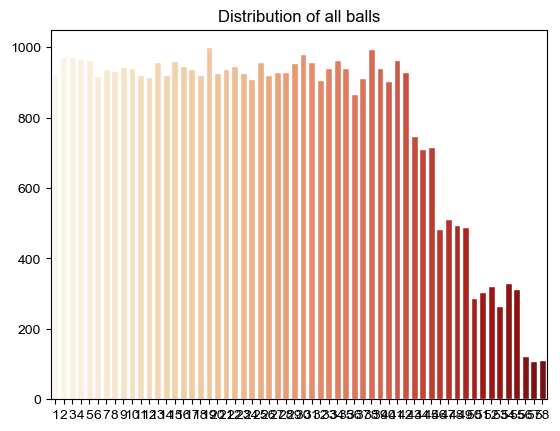

In [13]:
all_balls = {}
for i in range(1,7):
    ball_ser = filtered_data['BALL ' +str(i)].value_counts()
    for key in ball_ser.keys():
        all_balls[key] = all_balls.get(key,0) + ball_ser[key]
    

all_balls = pd.Series(all_balls) 

plt.title('Distribution of all balls')
plt.xticks(rotation=0)
sns.set(rc={'figure.figsize':(25,8)})
sns.barplot(x=all_balls.keys(), y=all_balls.values, palette="OrRd")

We can see in the graph that the numbers after 42 are selected less. This is because we are looking at the results of five lottery games. 

All the games can play numbers 1 to 42, therefore, the numbers 43 to 45 will receive a drop of selections as only four games can play this pool of numbers. Likewise, there will be another drop for 46 to 49 with three games that can play this pool of numbers, another drop for 50 to 55 with only two games having the ability to play that pool, and the last drop for numbers 56 to 58 which can only be played by one game.

Since our objective is to analyze the games and the best day to play, *let's analyze the numbers per game.*

## Per Game Analysis

Let's investigate the following details per game:
- Highest and lowest jackpot
- Day with the most and least wins
- Highest number of winners
- Distribution of each ball

### Lotto 6/42
Let's create a dataframe with only the Lotto 6/42 data available.

In [14]:
#list the games we need in a dataframe
lotto_game1=['Lotto 6/42']

## select the rows based on the listed names in games
lotto42= filtered_data.loc[filtered_data['LOTTO GAME'].isin(lotto_game1)]
lotto42

,LOTTO GAME,DRAW DATE,JACKPOT,WINNERS,DAY,BALL 1,BALL 2,BALL 3,BALL 4,BALL 5,BALL 6
9,Lotto 6/42,2023-10-21,15027455.6,0,Saturday,3,22,2,17,14,39
27,Lotto 6/42,2023-10-19,10911401.2,0,Thursday,11,8,25,5,34,16
46,Lotto 6/42,2023-10-17,7176994.4,0,Tuesday,38,14,22,21,40,30
72,Lotto 6/42,2023-10-14,5940000.0,0,Saturday,23,16,26,37,25,41
90,Lotto 6/42,2023-10-12,34562804.2,1,Thursday,13,41,6,25,34,42
...,...,...,...,...,...,...,...,...,...,...,...
33086,Lotto 6/42,2013-01-12,6372592.2,0,Saturday,30,27,14,34,5,41
33104,Lotto 6/42,2013-01-10,3142548.0,0,Thursday,42,39,3,30,15,41
33122,Lotto 6/42,2013-01-08,3390093.0,1,Tuesday,8,23,20,21,2,33
33146,Lotto 6/42,2013-01-05,10363059.0,1,Saturday,33,31,19,23,28,15


Let's see what is the highest and lowest jackpot won.

In [15]:
max_jackpot1 = lotto42['JACKPOT'].max()
print("The largest jackpot won was:")
print(max_jackpot1)

min_jackpot1 = lotto42['JACKPOT'].min()
print("The lowest jackpot won was:")
print(min_jackpot1)

The largest jackpot won was:
111998556.0
The lowest jackpot won was:
3000000.0


Let's see the highest and lowest number of players winning a jackpot.

In [16]:
no_winners1 = lotto42.groupby("WINNERS")['LOTTO GAME'].count()
print(no_winners1)

WINNERS
0    1401
1     186
2      22
3       2
4       2
Name: LOTTO GAME, dtype: int64


Based on the PCSO website, Lotto 6/42 is drawn every **Tuesday, Thursday, and Saturday**. Let's check if the data is aligned with the information.

In [17]:
lotto42['DAY'].value_counts()

Tuesday     542
Saturday    536
Thursday    535
Name: DAY, dtype: Int64

Let's now check which day has the least and most number of winners.

In [18]:
tuesday = len(lotto42[(lotto42["DAY"]=="Tuesday") &
                      (lotto42["WINNERS"] >=1)])

thursday = len(lotto42[(lotto42["DAY"]=="Thursday") &
                      (lotto42["WINNERS"] >=1)])

saturday = len(lotto42[(lotto42["DAY"]=="Saturday") &
                      (lotto42["WINNERS"] >=1)])

print("The number of winners for Tuesday is:", tuesday)
print("The number of winners for Thursday is:", thursday)
print("The number of winners for Saturday is:", saturday)

t1=tuesday+thursday+saturday
print("Total number of winners is:", t1)

The number of winners for Tuesday is: 59
The number of winners for Thursday is: 71
The number of winners for Saturday is: 82
Total number of winners is: 212


Let's now visualize the ball distribution for the game.

<Axes: title={'center': 'Distribution of all balls in Lotto 6/42'}>

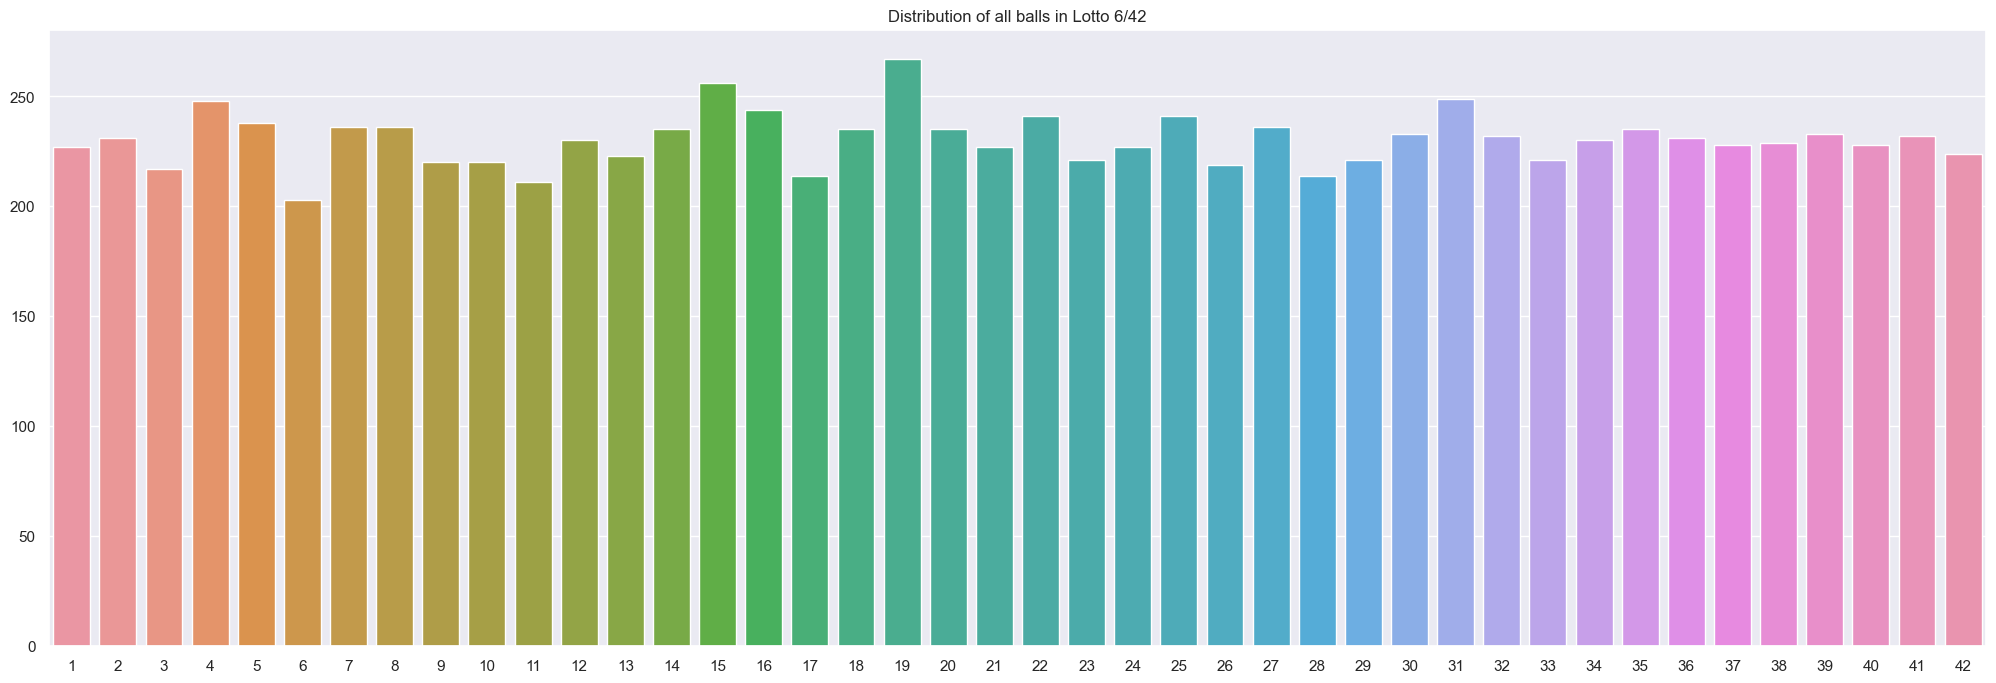

In [19]:
lotto42_balls = {}
for i in range(1,7):
    ball_ser42 = lotto42['BALL ' +str(i)].value_counts()
    for key in ball_ser42.keys():
        lotto42_balls[key] = lotto42_balls.get(key,0) + ball_ser42[key]

lotto42_balls = pd.Series(lotto42_balls) 

plt.title('Distribution of all balls in Lotto 6/42')
plt.xticks(rotation=0)
sns.barplot(x=lotto42_balls.keys(), y=lotto42_balls.values)

<Axes: >

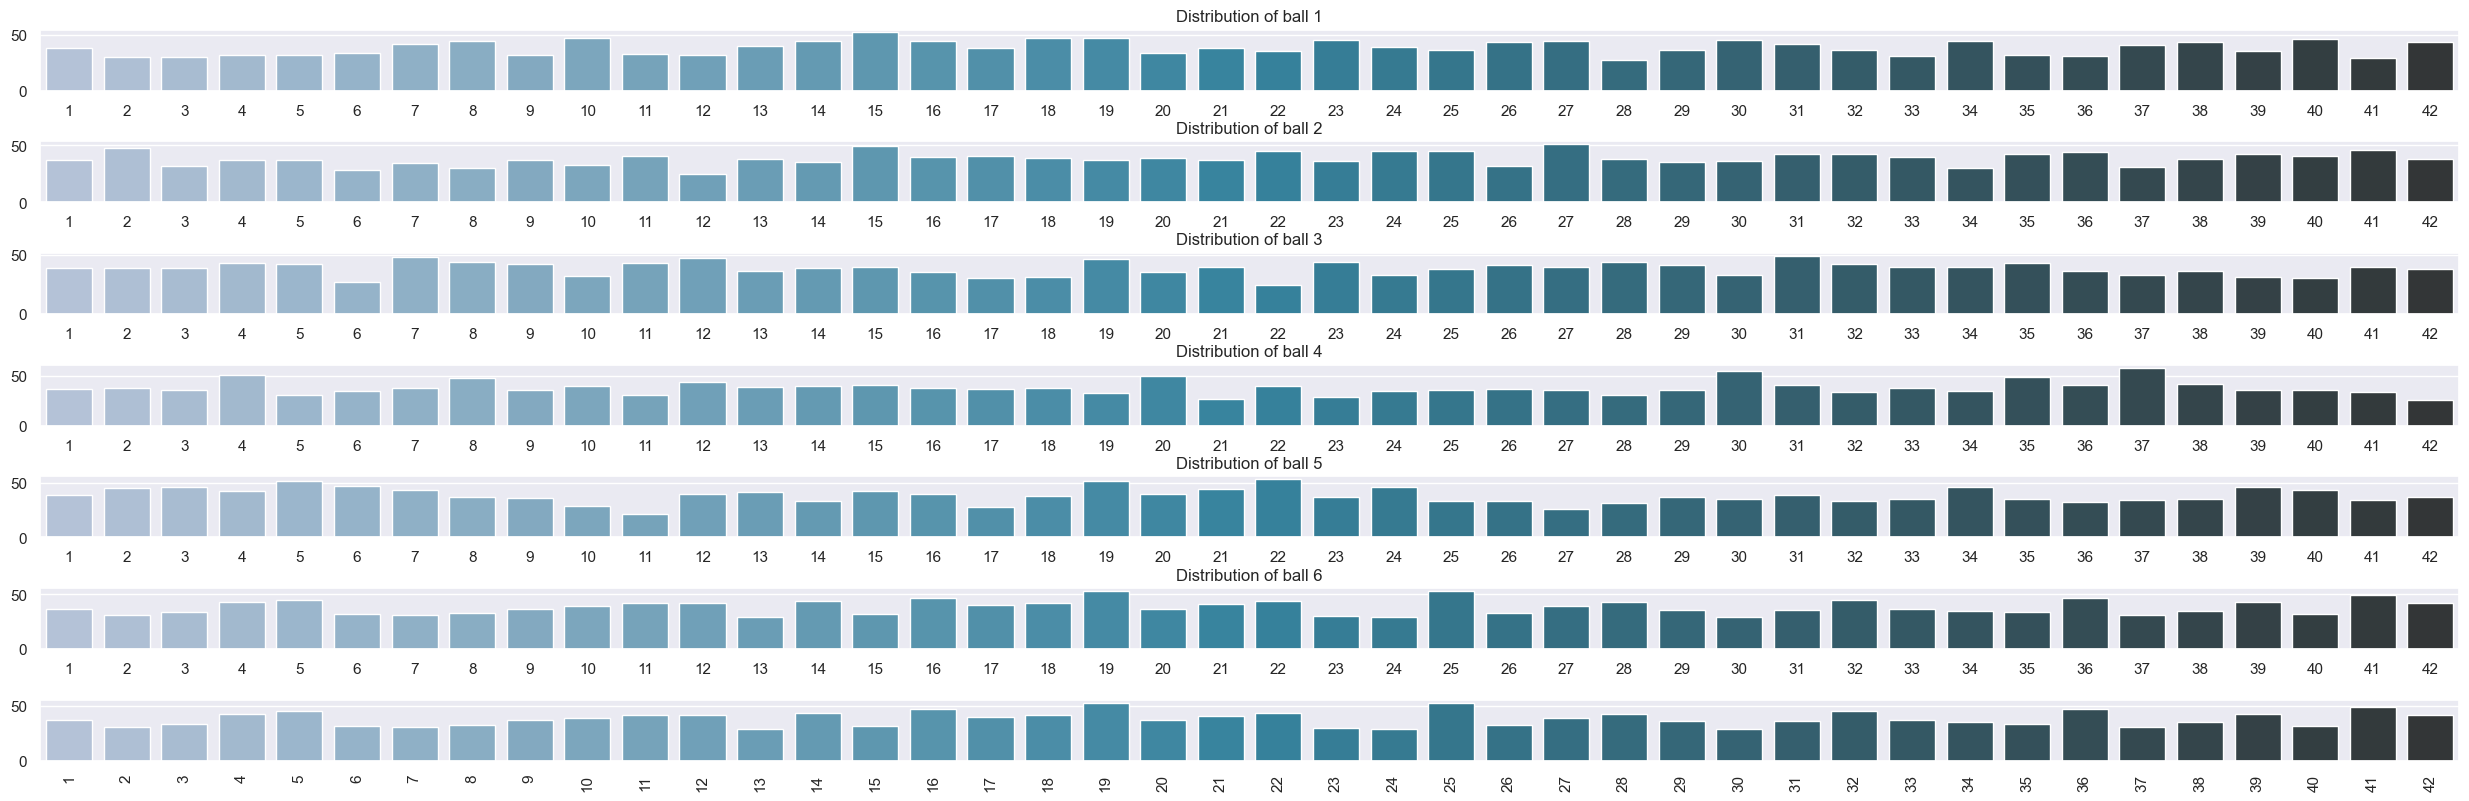

In [20]:
# Visualize the distributions of each ball
f, axes = plt.subplots(7, 1)
f.tight_layout() 
for i in range(1,7):
    ball_dist = lotto42['BALL ' +str(i)].value_counts().sort_index()
    axes[i-1].set_title('Distribution of ball '+str(i))
    plt.xticks(rotation=90)
    sns.barplot(x=ball_dist.keys(), y=ball_dist.values, ax=axes[i-1], palette="PuBuGn_d")

plt.xticks(rotation=90)
sns.barplot(x=ball_dist.keys(), y=ball_dist.values, ax=axes[6], palette="PuBuGn_d")

### Mega Lotto 6/45
Let's create a dataframe with only the Mega Lotto 6/45 data available.

In [21]:
#list the games we need in a dataframe
lotto_game2=['Megalotto 6/45']

## select the rows based on the listed names in games
megalotto45= filtered_data.loc[filtered_data['LOTTO GAME'].isin(lotto_game2)]
megalotto45

,LOTTO GAME,DRAW DATE,JACKPOT,WINNERS,DAY,BALL 1,BALL 2,BALL 3,BALL 4,BALL 5,BALL 6
18,Megalotto 6/45,2023-10-20,20644286.4,0,Friday,15,36,30,37,5,17
36,Megalotto 6/45,2023-10-18,16200622.4,0,Wednesday,36,29,4,26,34,15
55,Megalotto 6/45,2023-10-16,12050940.0,0,Monday,4,15,45,44,40,8
81,Megalotto 6/45,2023-10-13,8910000.0,0,Friday,18,11,32,19,39,33
99,Megalotto 6/45,2023-10-11,8910000.0,0,Wednesday,41,12,13,6,31,5
...,...,...,...,...,...,...,...,...,...,...,...
33090,Megalotto 6/45,2013-01-11,22095109.8,0,Friday,36,30,34,23,16,24
33107,Megalotto 6/45,2013-01-09,16896742.2,0,Wednesday,41,45,2,22,27,35
33125,Megalotto 6/45,2013-01-07,12646638.0,0,Monday,4,44,22,15,21,38
33150,Megalotto 6/45,2013-01-04,8509962.6,0,Friday,19,28,9,33,34,45


Let's see what is the highest and lowest jackpot won.

In [22]:
max_jackpot2 = megalotto45['JACKPOT'].max()
print("The largest jackpot won was:")
print(max_jackpot2)

min_jackpot2 = megalotto45['JACKPOT'].min()
print("The lowest jackpot won was:")
print(min_jackpot2)

The largest jackpot won was:
225248638.0
The lowest jackpot won was:
4500000.0


Let's see the highest and lowest number of players winning a jackpot.

In [23]:
no_winners2 = megalotto45.groupby("WINNERS")['LOTTO GAME'].count()
print(no_winners2)

WINNERS
0    1460
1     135
2      18
3       5
Name: LOTTO GAME, dtype: int64


Based on the PCSO website, the Mega Lotto 6/45 is drawn every **Monday, Wednesday, and Friday**. Let's check if the data is aligned with the information.

In [24]:
megalotto45['DAY'].value_counts()

Monday       543
Wednesday    541
Friday       534
Name: DAY, dtype: Int64

Let's now check which day has the least and most number of winners.

In [25]:
mega_monday = len(megalotto45[(megalotto45["DAY"]=="Monday") &
                      (megalotto45["WINNERS"] >=1)])

mega_wednesday = len(megalotto45[(megalotto45["DAY"]=="Wednesday") &
                      (megalotto45["WINNERS"] >=1)])

mega_friday = len(megalotto45[(megalotto45["DAY"]=="Friday") &
                      (megalotto45["WINNERS"] >=1)])

print("The number of winners for Monday is:", mega_monday)
print("The number of winners for Wednesday is:", mega_wednesday)
print("The number of winners for Friday is:", mega_friday)

t2=mega_monday+mega_wednesday+mega_friday
print("Total number of winners is:", t2)

The number of winners for Monday is: 56
The number of winners for Wednesday is: 41
The number of winners for Friday is: 61
Total number of winners is: 158


Let's now visualize the ball distribution for the game.

<Axes: title={'center': 'Distribution of all balls in Mega Lotto 6/45'}>

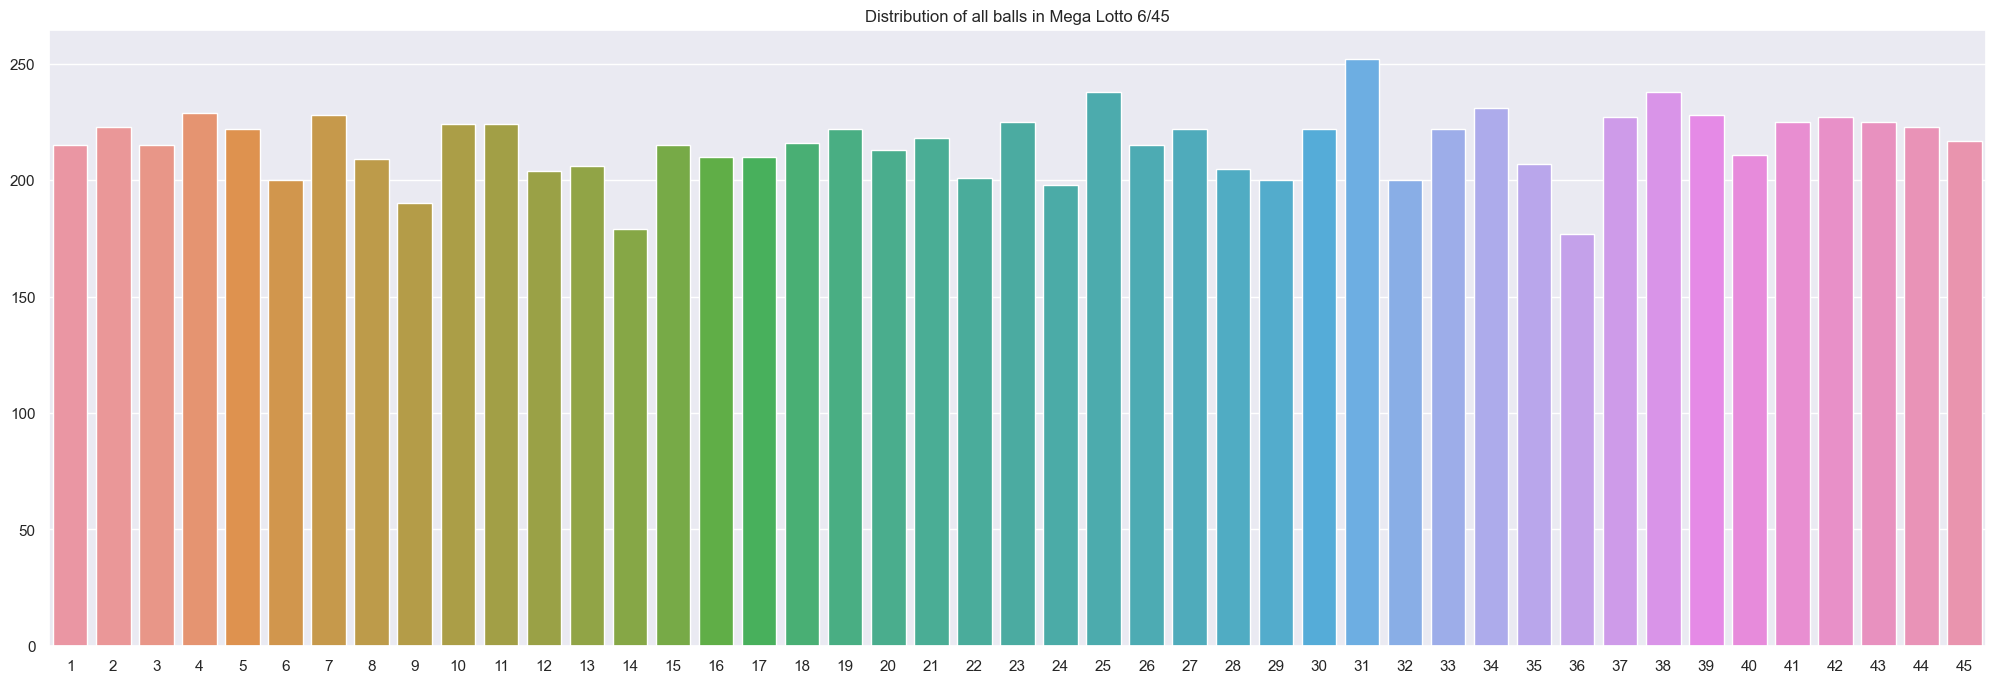

In [26]:
megalotto45_balls = {}
for i in range(1,7):
    ball_ser45 = megalotto45['BALL ' +str(i)].value_counts()
    for key in ball_ser45.keys():
        megalotto45_balls[key] = megalotto45_balls.get(key,0) + ball_ser45[key]

megalotto45_balls = pd.Series(megalotto45_balls) 

plt.title('Distribution of all balls in Mega Lotto 6/45')
plt.xticks(rotation=0)
sns.barplot(x=megalotto45_balls.keys(), y=megalotto45_balls.values)

<Axes: >

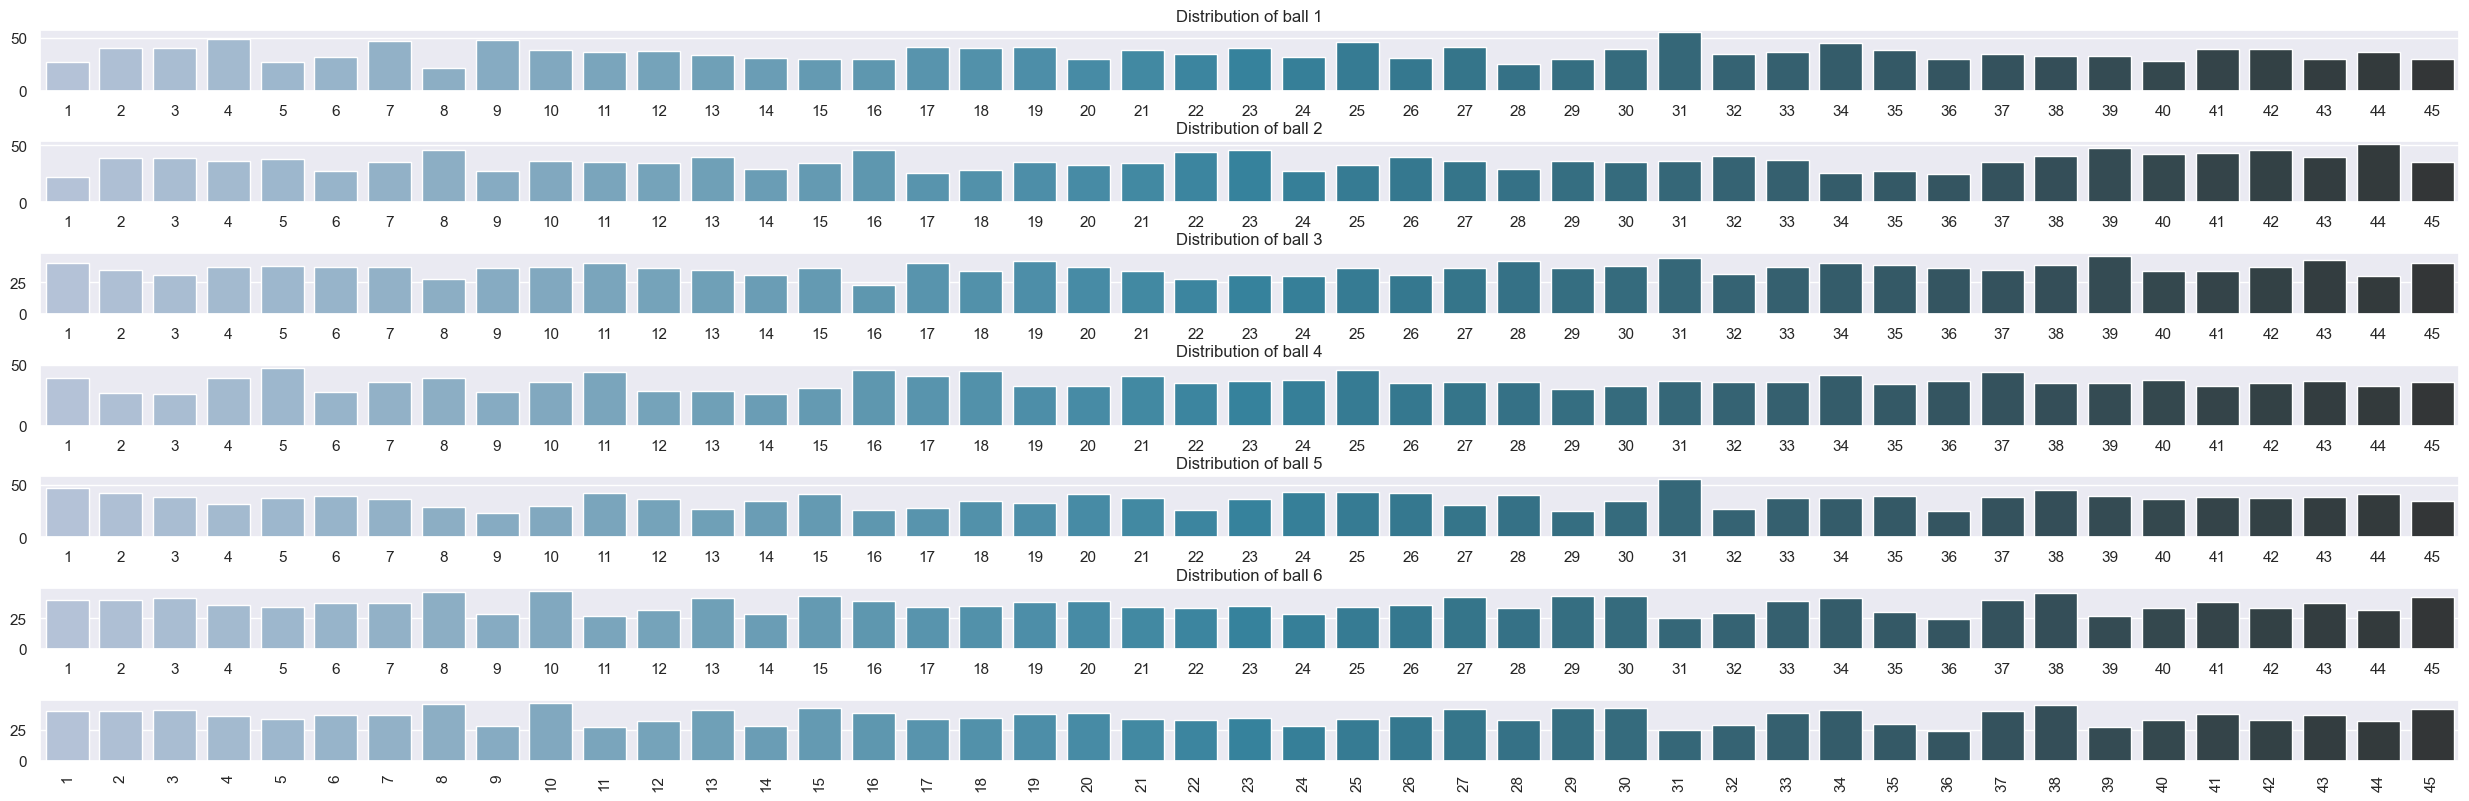

In [27]:
# Visualize the distributions of each ball
f, axes = plt.subplots(7, 1)
f.tight_layout() 
for i in range(1,7):
    ball_dist = megalotto45['BALL ' +str(i)].value_counts().sort_index()
    axes[i-1].set_title('Distribution of ball '+str(i))
    plt.xticks(rotation=90)
    sns.barplot(x=ball_dist.keys(), y=ball_dist.values, ax=axes[i-1], palette="PuBuGn_d")

plt.xticks(rotation=90)
sns.barplot(x=ball_dist.keys(), y=ball_dist.values, ax=axes[6], palette="PuBuGn_d")

### Super Lotto 6/49
Let's create a dataframe with only the Super Lotto 6/49 data available.

In [28]:
#list the games we need in a dataframe
lotto_game3=['Superlotto 6/49']

## select the rows based on the listed names in games
superlotto49= filtered_data.loc[filtered_data['LOTTO GAME'].isin(lotto_game3)]
superlotto49

,LOTTO GAME,DRAW DATE,JACKPOT,WINNERS,DAY,BALL 1,BALL 2,BALL 3,BALL 4,BALL 5,BALL 6
1,Superlotto 6/49,2023-10-22,15840000.0,0,Sunday,13,8,38,44,31,11
26,Superlotto 6/49,2023-10-19,15840000.0,1,Thursday,26,31,41,14,5,10
45,Superlotto 6/49,2023-10-17,15840000.0,0,Tuesday,2,20,33,32,13,48
64,Superlotto 6/49,2023-10-15,147354716.4,1,Sunday,47,35,2,13,38,17
89,Superlotto 6/49,2023-10-12,136165815.6,0,Thursday,25,39,2,33,26,22
...,...,...,...,...,...,...,...,...,...,...,...
33074,Superlotto 6/49,2013-01-13,22458211.2,0,Sunday,32,21,18,49,7,5
33098,Superlotto 6/49,2013-01-10,16083082.8,0,Thursday,36,42,34,29,47,37
33116,Superlotto 6/49,2013-01-08,16000000.0,0,Tuesday,49,19,34,17,45,41
33134,Superlotto 6/49,2013-01-06,16000000.0,0,Sunday,18,2,46,3,30,38


Let's see what is the highest and lowest jackpot won.

In [29]:
max_jackpot3 = superlotto49['JACKPOT'].max()
print("The largest jackpot won was:")
print(max_jackpot3)

min_jackpot3 = superlotto49['JACKPOT'].min()
print("The lowest jackpot won was:")
print(min_jackpot3)

The largest jackpot won was:
265353489.6
The lowest jackpot won was:
15840000.0


Let's see the highest and lowest number of players winning a jackpot.

In [30]:
no_winners3 = superlotto49.groupby("WINNERS")['LOTTO GAME'].count()
print(no_winners3)

WINNERS
0    1497
1     103
2       9
Name: LOTTO GAME, dtype: int64


Based on the PCSO website, Super Lotto 6/49 is drawn every **Tuesday, Thursday, and Sunday**. Let's check if the data is aligned with the information.

In [31]:
superlotto49['DAY'].value_counts()

Tuesday     542
Thursday    535
Sunday      532
Name: DAY, dtype: Int64

Let's now check which day has the least and most number of winners.

In [32]:
super_tuesday = len(superlotto49[(superlotto49["DAY"]=="Tuesday") &
                      (superlotto49["WINNERS"] >=1)])

super_thursday = len(superlotto49[(superlotto49["DAY"]=="Thursday") &
                      (superlotto49["WINNERS"] >=1)])

super_Sunday = len(superlotto49[(superlotto49["DAY"]=="Sunday") &
                      (superlotto49["WINNERS"] >=1)])

print("The number of winners for Tuesday is:", super_tuesday)
print("The number of winners for Thursday is:", super_thursday)
print("The number of winners for Sunday is:", super_Sunday)

t3=super_tuesday+super_thursday+super_Sunday
print("Total number of winners is:", t3)

The number of winners for Tuesday is: 28
The number of winners for Thursday is: 40
The number of winners for Sunday is: 44
Total number of winners is: 112


Let's now visualize the ball distribution for the game.

<Axes: title={'center': 'Distribution of all balls in Super Lotto 6/49'}>

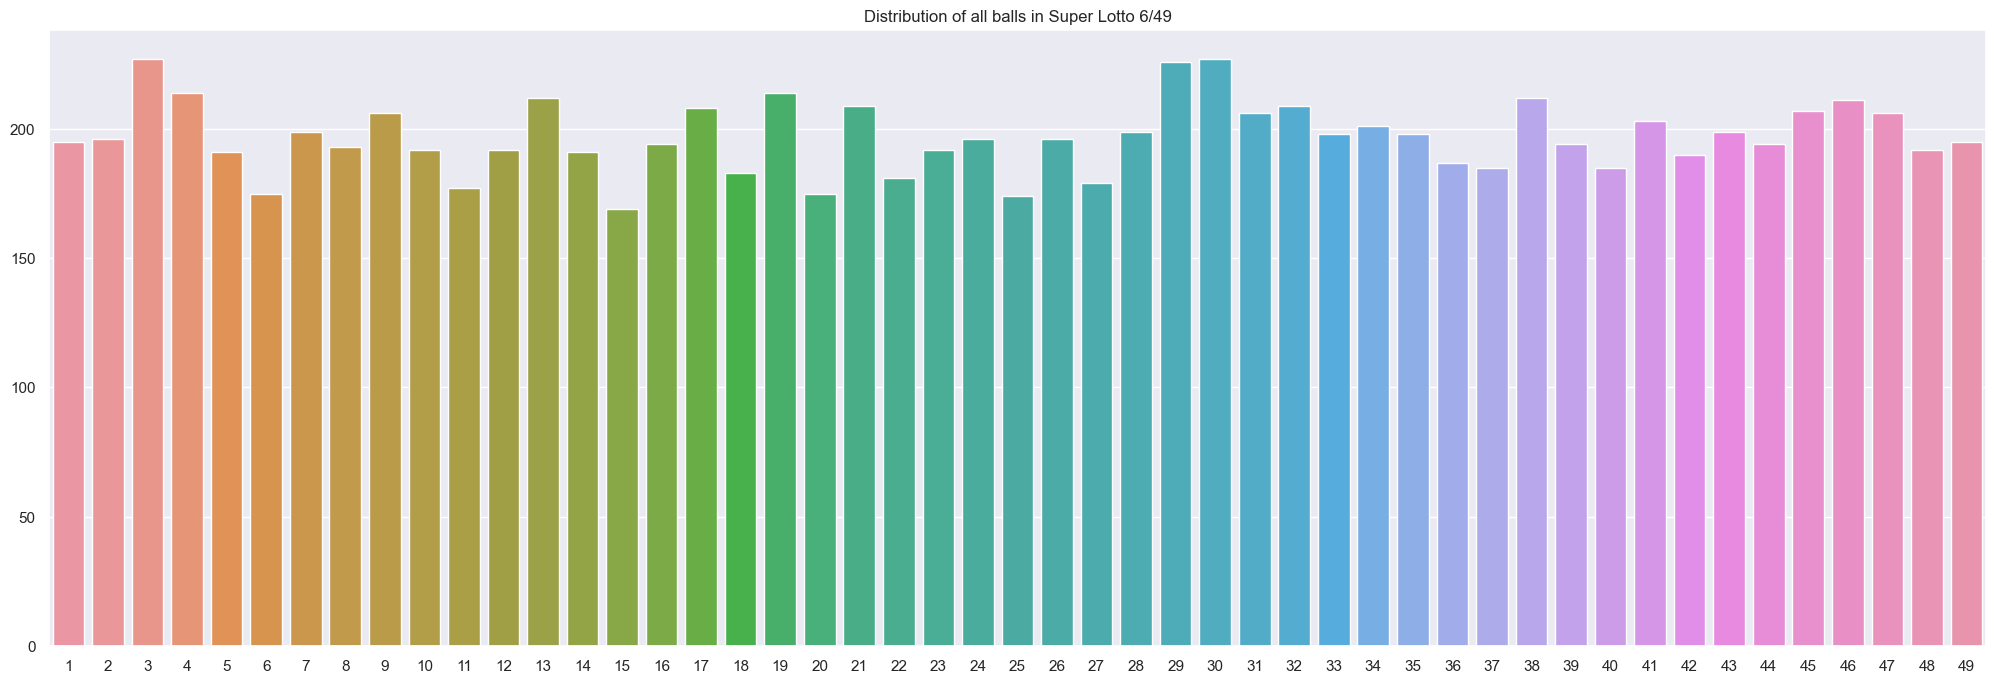

In [33]:
superlotto49_balls = {}
for i in range(1,7):
    ball_ser49 = superlotto49['BALL ' +str(i)].value_counts()
    for key in ball_ser49.keys():
        superlotto49_balls[key] = superlotto49_balls.get(key,0) + ball_ser49[key]

superlotto49_balls = pd.Series(superlotto49_balls) 

plt.title('Distribution of all balls in Super Lotto 6/49')
plt.xticks(rotation=0)
sns.barplot(x=superlotto49_balls.keys(), y=superlotto49_balls.values)

<Axes: >

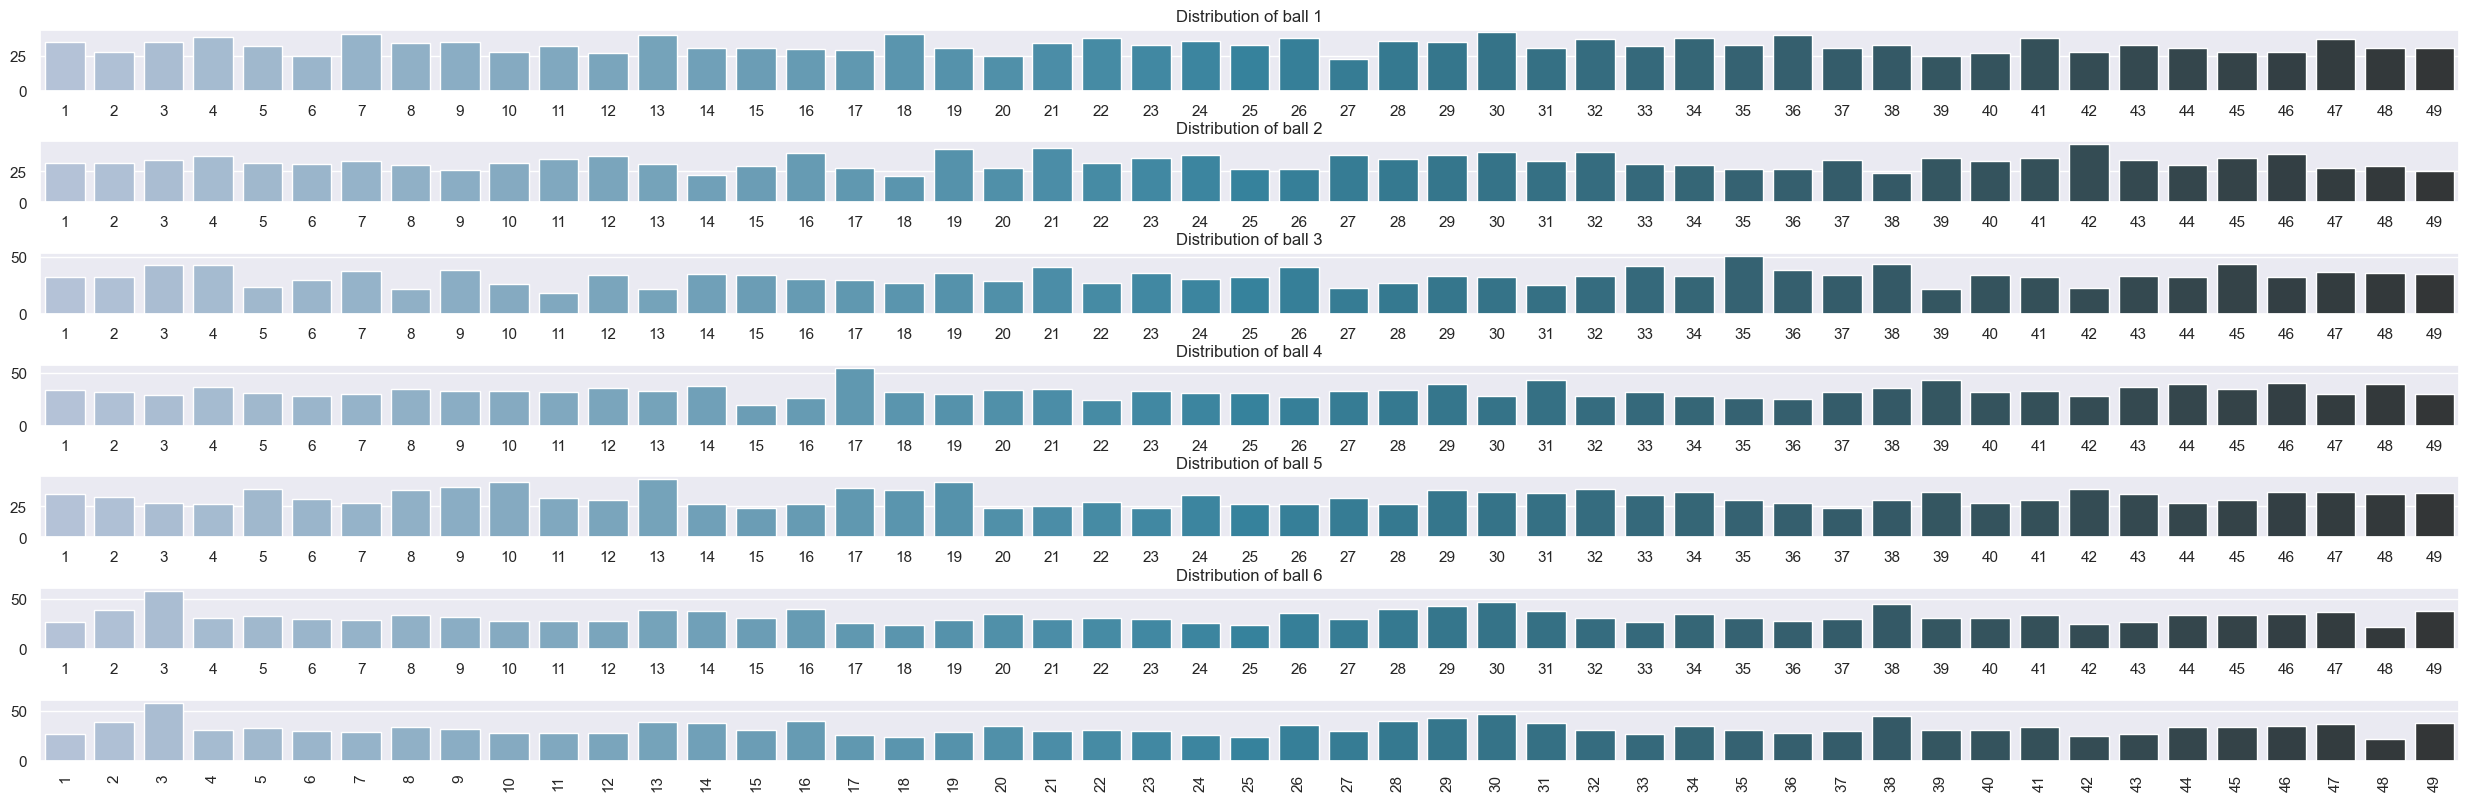

In [34]:
# Visualize the distributions of each ball
f, axes = plt.subplots(7, 1)
f.tight_layout() 
for i in range(1,7):
    ball_dist = superlotto49['BALL ' +str(i)].value_counts().sort_index()
    axes[i-1].set_title('Distribution of ball '+str(i))
    plt.xticks(rotation=90)
    sns.barplot(x=ball_dist.keys(), y=ball_dist.values, ax=axes[i-1], palette="PuBuGn_d")

plt.xticks(rotation=90)
sns.barplot(x=ball_dist.keys(), y=ball_dist.values, ax=axes[6], palette="PuBuGn_d")

### Grand Lotto 6/55
Let's create a dataframe with only the Grand Lotto 6/55 data available.

In [35]:
#list the games we need in a dataframe
lotto_game4=['Grand Lotto 6/55']

## select the rows based on the listed names in games
grandlotto55= filtered_data.loc[filtered_data['LOTTO GAME'].isin(lotto_game4)]
grandlotto55

,LOTTO GAME,DRAW DATE,JACKPOT,WINNERS,DAY,BALL 1,BALL 2,BALL 3,BALL 4,BALL 5,BALL 6
8,Grand Lotto 6/55,2023-10-21,42610676.0,0,Saturday,4,42,44,49,39,21
35,Grand Lotto 6/55,2023-10-18,38046781.6,0,Wednesday,12,34,3,29,15,40
54,Grand Lotto 6/55,2023-10-16,33691151.6,0,Monday,11,48,25,2,30,38
71,Grand Lotto 6/55,2023-10-14,29700000.0,0,Saturday,55,37,9,26,10,43
98,Grand Lotto 6/55,2023-10-11,29700000.0,0,Wednesday,14,7,37,20,47,43
...,...,...,...,...,...,...,...,...,...,...,...
33089,Grand Lotto 6/55,2013-01-12,30000000.0,0,Saturday,39,20,33,19,14,22
33115,Grand Lotto 6/55,2013-01-09,30000000.0,0,Wednesday,25,52,54,37,20,51
33133,Grand Lotto 6/55,2013-01-07,30000000.0,0,Monday,8,45,12,20,47,28
33149,Grand Lotto 6/55,2013-01-05,94226263.2,1,Saturday,55,38,13,28,41,39


Let's see what is the highest and lowest jackpot won.

In [36]:
max_jackpot4 = grandlotto55['JACKPOT'].max()
print("The largest jackpot won was:")
print(max_jackpot4)

min_jackpot4 = grandlotto55['JACKPOT'].min()
print("The lowest jackpot won was:")
print(min_jackpot4)

The largest jackpot won was:
401186804.8
The lowest jackpot won was:
29700000.0


Let's see the highest and lowest number of players winning a jackpot.

In [37]:
no_winners4 = grandlotto55.groupby("WINNERS")['LOTTO GAME'].count()
print(no_winners4)

WINNERS
0      1544
1        69
2         5
3         1
433       1
Name: LOTTO GAME, dtype: int64


Before we continue, let's view the details of the case where there was an astounding number of 433 winners of the game.

In [38]:
grandlotto55.loc[grandlotto55['WINNERS'] == 433]

,LOTTO GAME,DRAW DATE,JACKPOT,WINNERS,DAY,BALL 1,BALL 2,BALL 3,BALL 4,BALL 5,BALL 6
3422,Grand Lotto 6/55,2022-10-01,236091188.4,433,Saturday,9,45,36,27,18,54


Based on the PCSO website, Grand Lotto 6/55 is drawn every **Monday, Wednesday, and Saturday**. Let's check if the data is aligned with the information.

In [39]:
grandlotto55['DAY'].value_counts()

Monday       543
Wednesday    541
Saturday     536
Name: DAY, dtype: Int64

Let's now check which day has the least and most number of winners.

In [40]:
grand_monday = len(grandlotto55[(grandlotto55["DAY"]=="Monday") &
                      (grandlotto55["WINNERS"] >=1)])

grand_wednesday = len(grandlotto55[(grandlotto55["DAY"]=="Wednesday") &
                      (grandlotto55["WINNERS"] >=1)])

grand_saturday = len(grandlotto55[(grandlotto55["DAY"]=="Saturday") &
                      (grandlotto55["WINNERS"] >=1)])

print("The number of winners for Monday is:", grand_monday)
print("The number of winners for Wednesday is:", grand_wednesday)
print("The number of winners for Saturday is:", grand_saturday)

t4=grand_monday+grand_wednesday+grand_saturday
print("Total number of winners is:", t4)

The number of winners for Monday is: 24
The number of winners for Wednesday is: 16
The number of winners for Saturday is: 36
Total number of winners is: 76


Let's now visualize the ball distribution for the game.

<Axes: title={'center': 'Distribution of all balls in Grand Lotto 6/55'}>

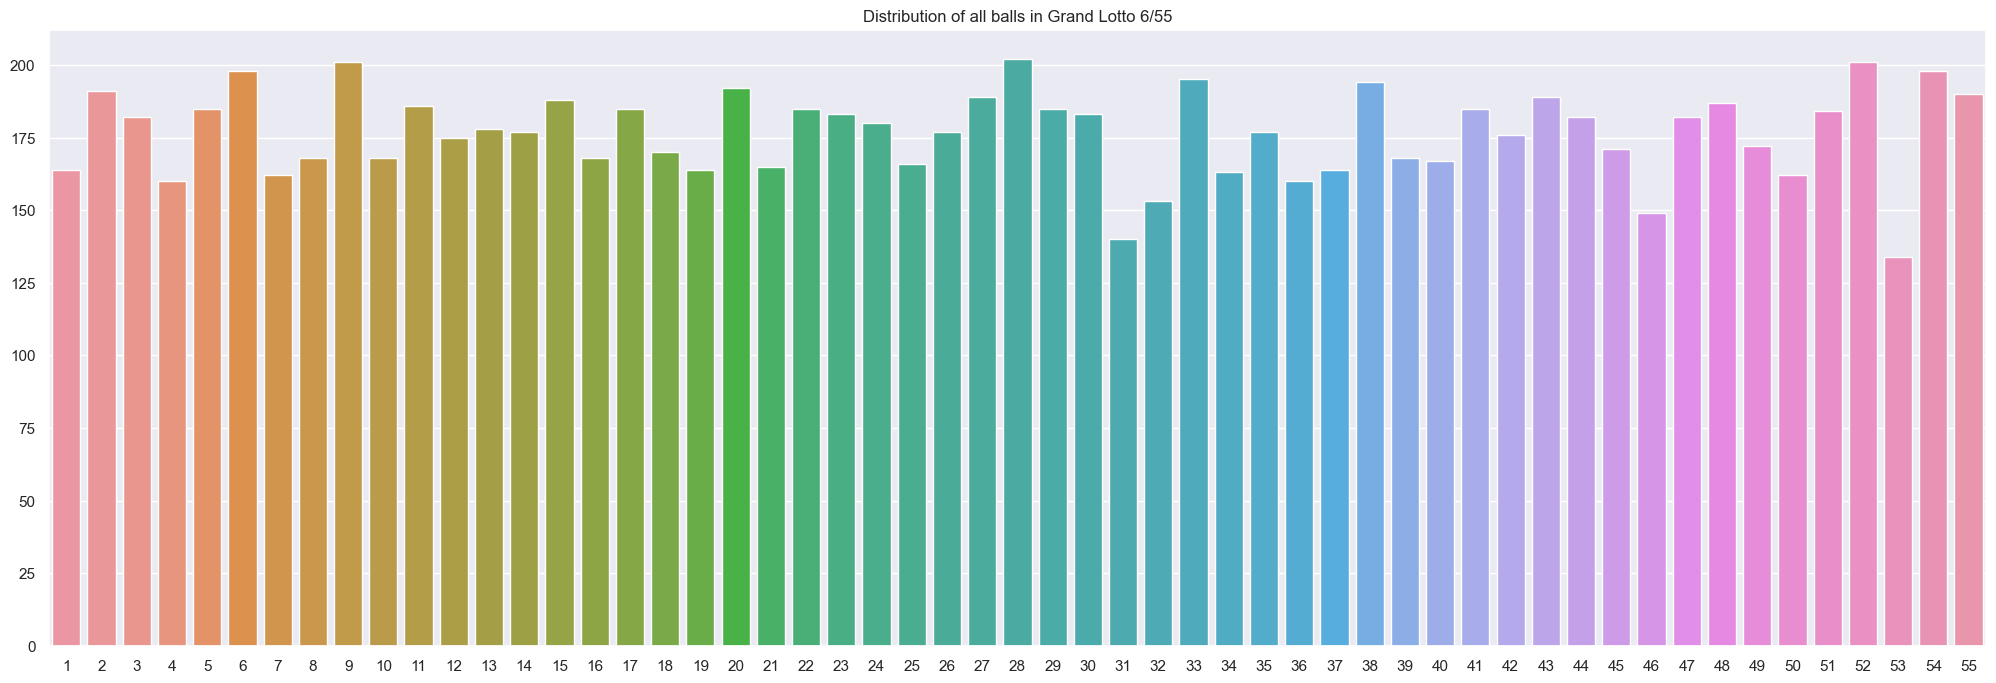

In [41]:
grandlotto55_balls = {}
for i in range(1,7):
    ball_ser55 = grandlotto55['BALL ' +str(i)].value_counts()
    for key in ball_ser55.keys():
        grandlotto55_balls[key] = grandlotto55_balls.get(key,0) + ball_ser55[key]

grandlotto55_balls = pd.Series(grandlotto55_balls) 

plt.title('Distribution of all balls in Grand Lotto 6/55')
plt.xticks(rotation=0)
sns.barplot(x=grandlotto55_balls.keys(), y=grandlotto55_balls.values)

<Axes: >

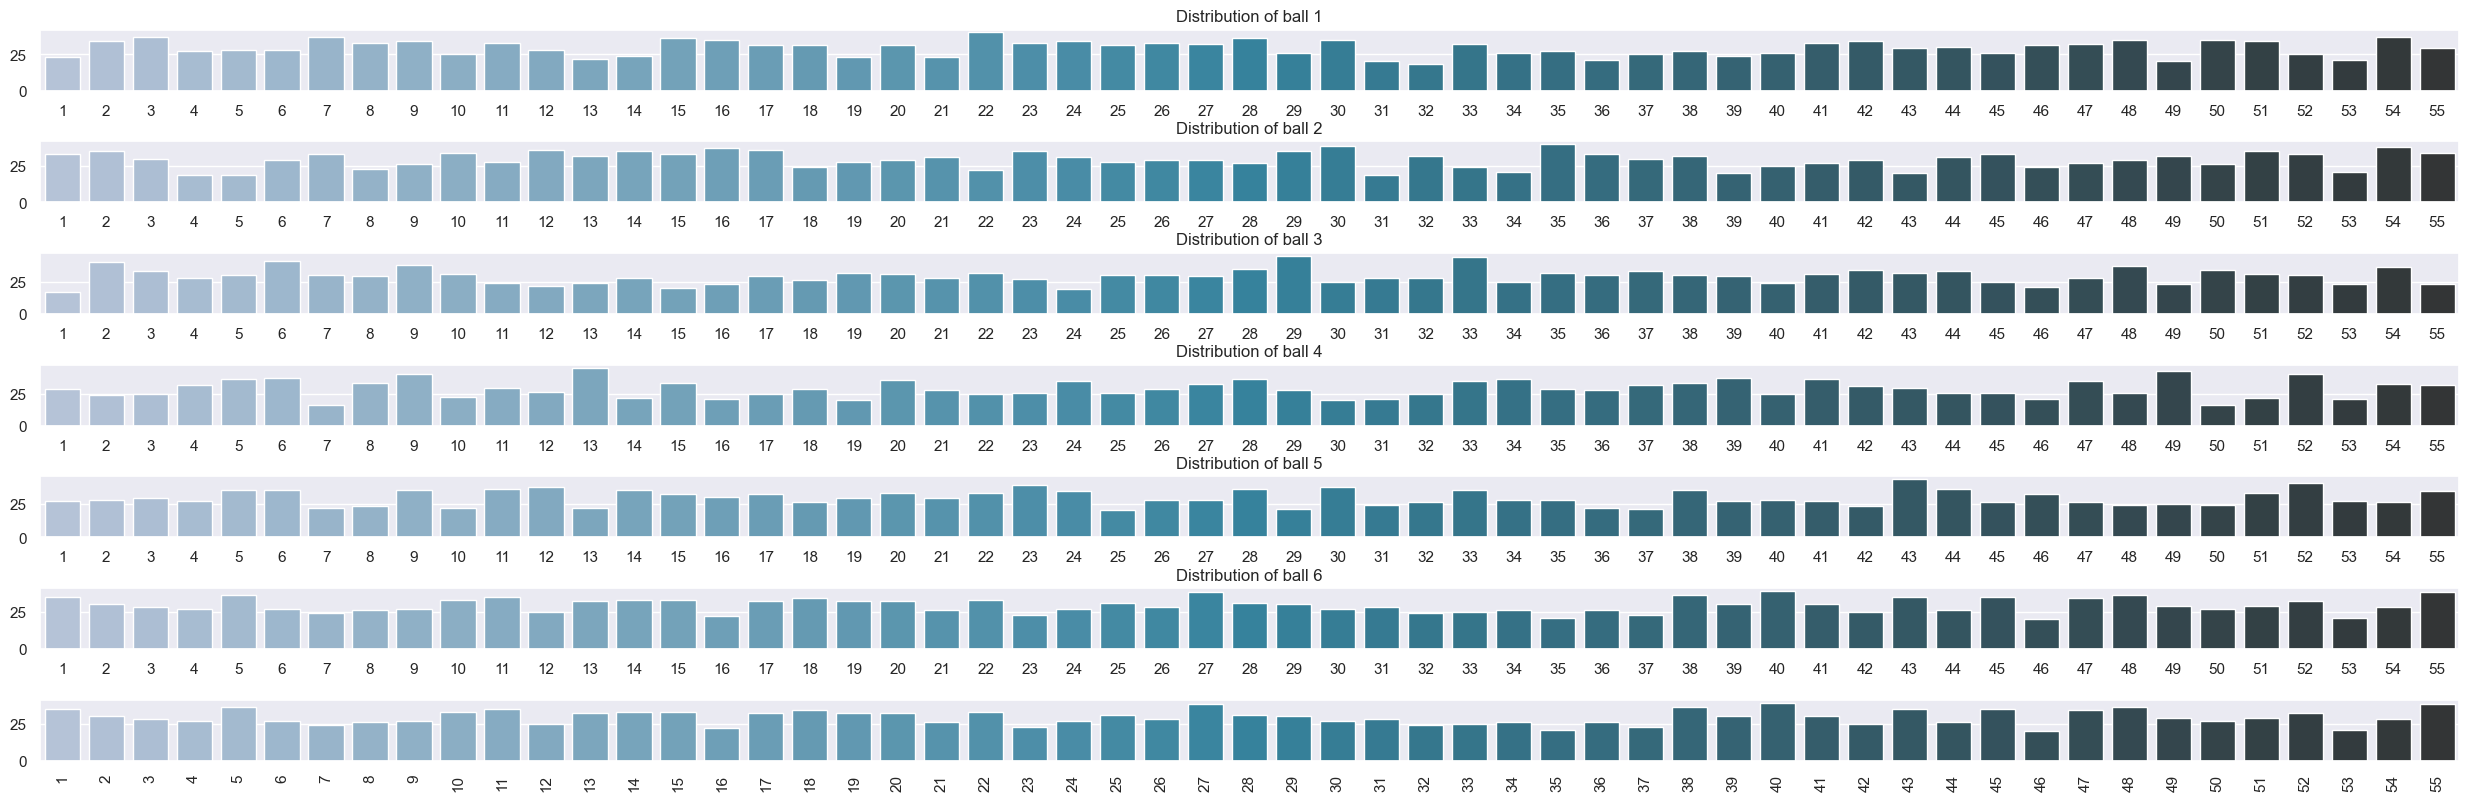

In [42]:
# Visualize the distributions of each ball
f, axes = plt.subplots(7, 1)
f.tight_layout() 
for i in range(1,7):
    ball_dist = grandlotto55['BALL ' +str(i)].value_counts().sort_index()
    axes[i-1].set_title('Distribution of ball '+str(i))
    plt.xticks(rotation=90)
    sns.barplot(x=ball_dist.keys(), y=ball_dist.values, ax=axes[i-1], palette="PuBuGn_d")

plt.xticks(rotation=90)
sns.barplot(x=ball_dist.keys(), y=ball_dist.values, ax=axes[6], palette="PuBuGn_d")

### Ultra Lotto 6/58
Let's create a dataframe with only the Ultra Lotto 6/58 data available.

In [43]:
#list the games we need in a dataframe
lotto_game5=['Ultra Lotto 6/58']

## select the rows based on the listed names in games
ultralotto58= filtered_data.loc[filtered_data['LOTTO GAME'].isin(lotto_game5)]
ultralotto58

,LOTTO GAME,DRAW DATE,JACKPOT,WINNERS,DAY,BALL 1,BALL 2,BALL 3,BALL 4,BALL 5,BALL 6
0,Ultra Lotto 6/58,2023-10-22,57271281.8,0,Sunday,11,37,44,33,13,28
17,Ultra Lotto 6/58,2023-10-20,52222306.8,0,Friday,25,54,48,50,37,29
44,Ultra Lotto 6/58,2023-10-17,49500000.0,0,Tuesday,51,48,44,5,14,12
63,Ultra Lotto 6/58,2023-10-15,49500000.0,0,Sunday,56,53,40,6,35,42
80,Ultra Lotto 6/58,2023-10-13,49500000.0,0,Friday,34,51,20,55,23,2
...,...,...,...,...,...,...,...,...,...,...,...
26571,Ultra Lotto 6/58,2015-02-22,50000000.0,1,Sunday,47,5,17,16,57,58
26596,Ultra Lotto 6/58,2015-02-20,50000000.0,0,Friday,13,14,7,41,48,39
26640,Ultra Lotto 6/58,2015-02-15,50000000.0,0,Sunday,32,53,5,18,34,29
26658,Ultra Lotto 6/58,2015-02-13,50000000.0,0,Friday,43,24,36,16,39,22


Let's see what is the highest and lowest jackpot won.

In [44]:
max_jackpot5 = ultralotto58['JACKPOT'].max()
print("The largest jackpot won was:")
print(max_jackpot5)

min_jackpot5 = ultralotto58['JACKPOT'].min()
print("The lowest jackpot won was:")
print(min_jackpot5)

The largest jackpot won was:
1180622508.0
The lowest jackpot won was:
49500000.0


Let's see the highest and lowest number of players winning a jackpot.

In [45]:
no_winners5 = ultralotto58.groupby("WINNERS")['LOTTO GAME'].count()
print(no_winners5)

WINNERS
0    1145
1      28
2       5
3       1
Name: LOTTO GAME, dtype: int64


Based on the PCSO website, Ultra Lotto 6/58 is drawn every **Tuesday, Friday, and Sunday**. Let's check if the data is aligned with the information.

In [46]:
ultralotto58['DAY'].value_counts()

Friday     426
Sunday     425
Tuesday    328
Name: DAY, dtype: Int64

Let's now check which day has the least and most number of winners.

In [47]:
ultra_tuesday = len(ultralotto58[(ultralotto58["DAY"]=="Tuesday") &
                      (ultralotto58["WINNERS"] >=1)])

ultra_friday = len(ultralotto58[(ultralotto58["DAY"]=="Friday") &
                      (ultralotto58["WINNERS"] >=1)])

ultra_sunday = len(ultralotto58[(ultralotto58["DAY"]=="Sunday") &
                      (ultralotto58["WINNERS"] >=1)])

print("The number of winners for Tuesday is:", ultra_tuesday)
print("The number of winners for Friday is:", ultra_friday)
print("The number of winners for Sunday is:", ultra_sunday)

t5=ultra_tuesday+ultra_friday+ultra_sunday
print("Total number of winners is:", t5)

The number of winners for Tuesday is: 8
The number of winners for Friday is: 15
The number of winners for Sunday is: 11
Total number of winners is: 34


Let's now visualize the ball distribution for the game.

<Axes: title={'center': 'Distribution of all balls in Ultra Lotto 6/58'}>

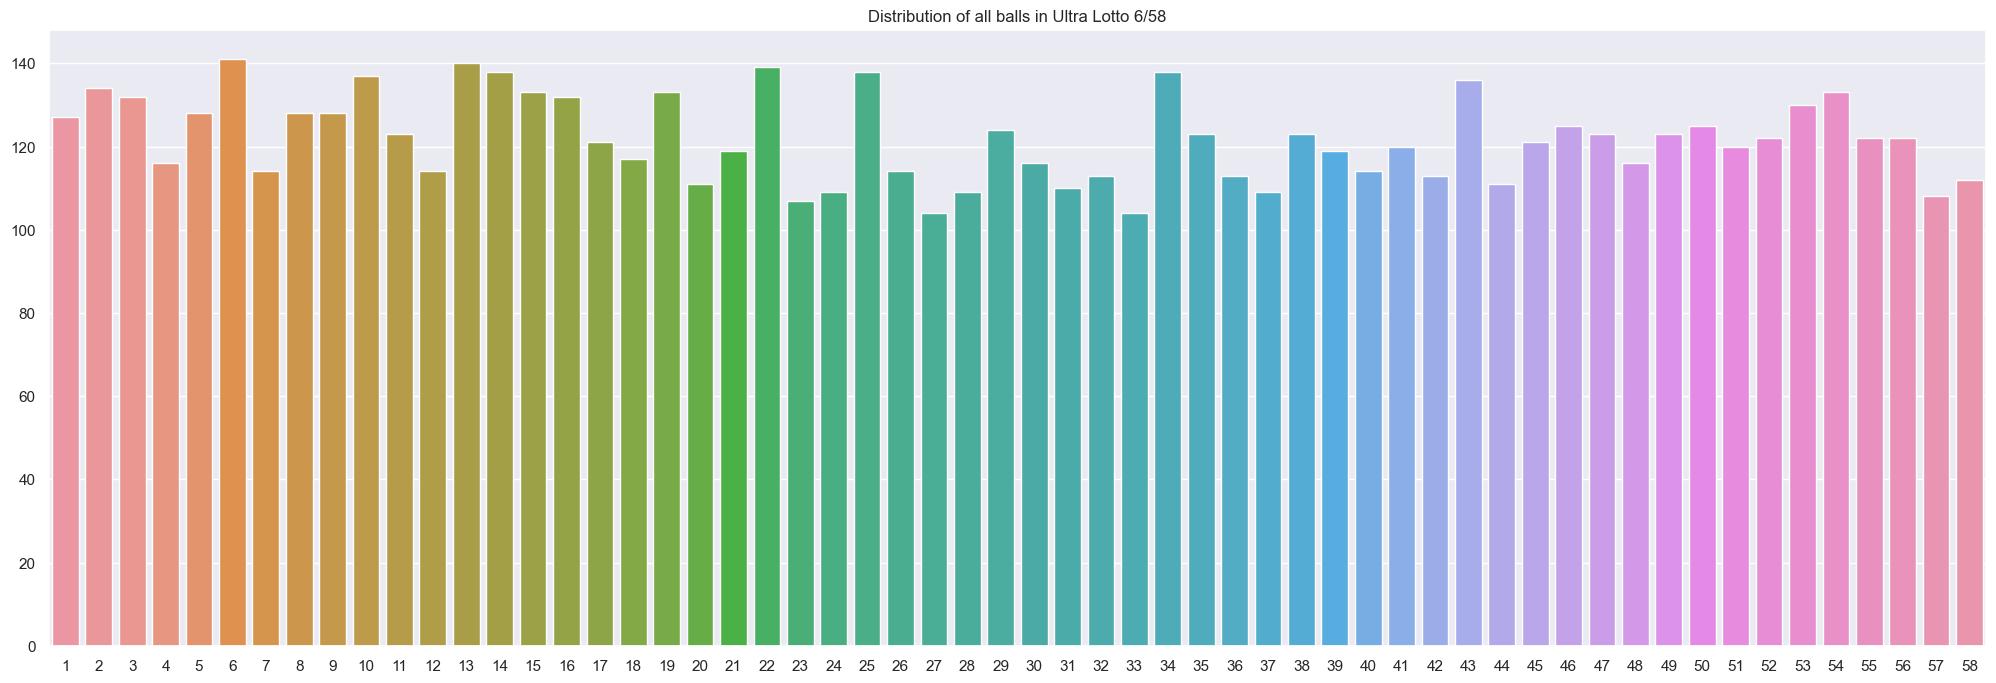

In [48]:
ultralotto58_balls = {}
for i in range(1,7):
    ball_ser58 = ultralotto58['BALL ' +str(i)].value_counts()
    for key in ball_ser58.keys():
        ultralotto58_balls[key] = ultralotto58_balls.get(key,0) + ball_ser58[key]

ultralotto58_balls = pd.Series(ultralotto58_balls) 

plt.title('Distribution of all balls in Ultra Lotto 6/58')
plt.xticks(rotation=0)
sns.barplot(x=ultralotto58_balls.keys(), y=ultralotto58_balls.values)

<Axes: >

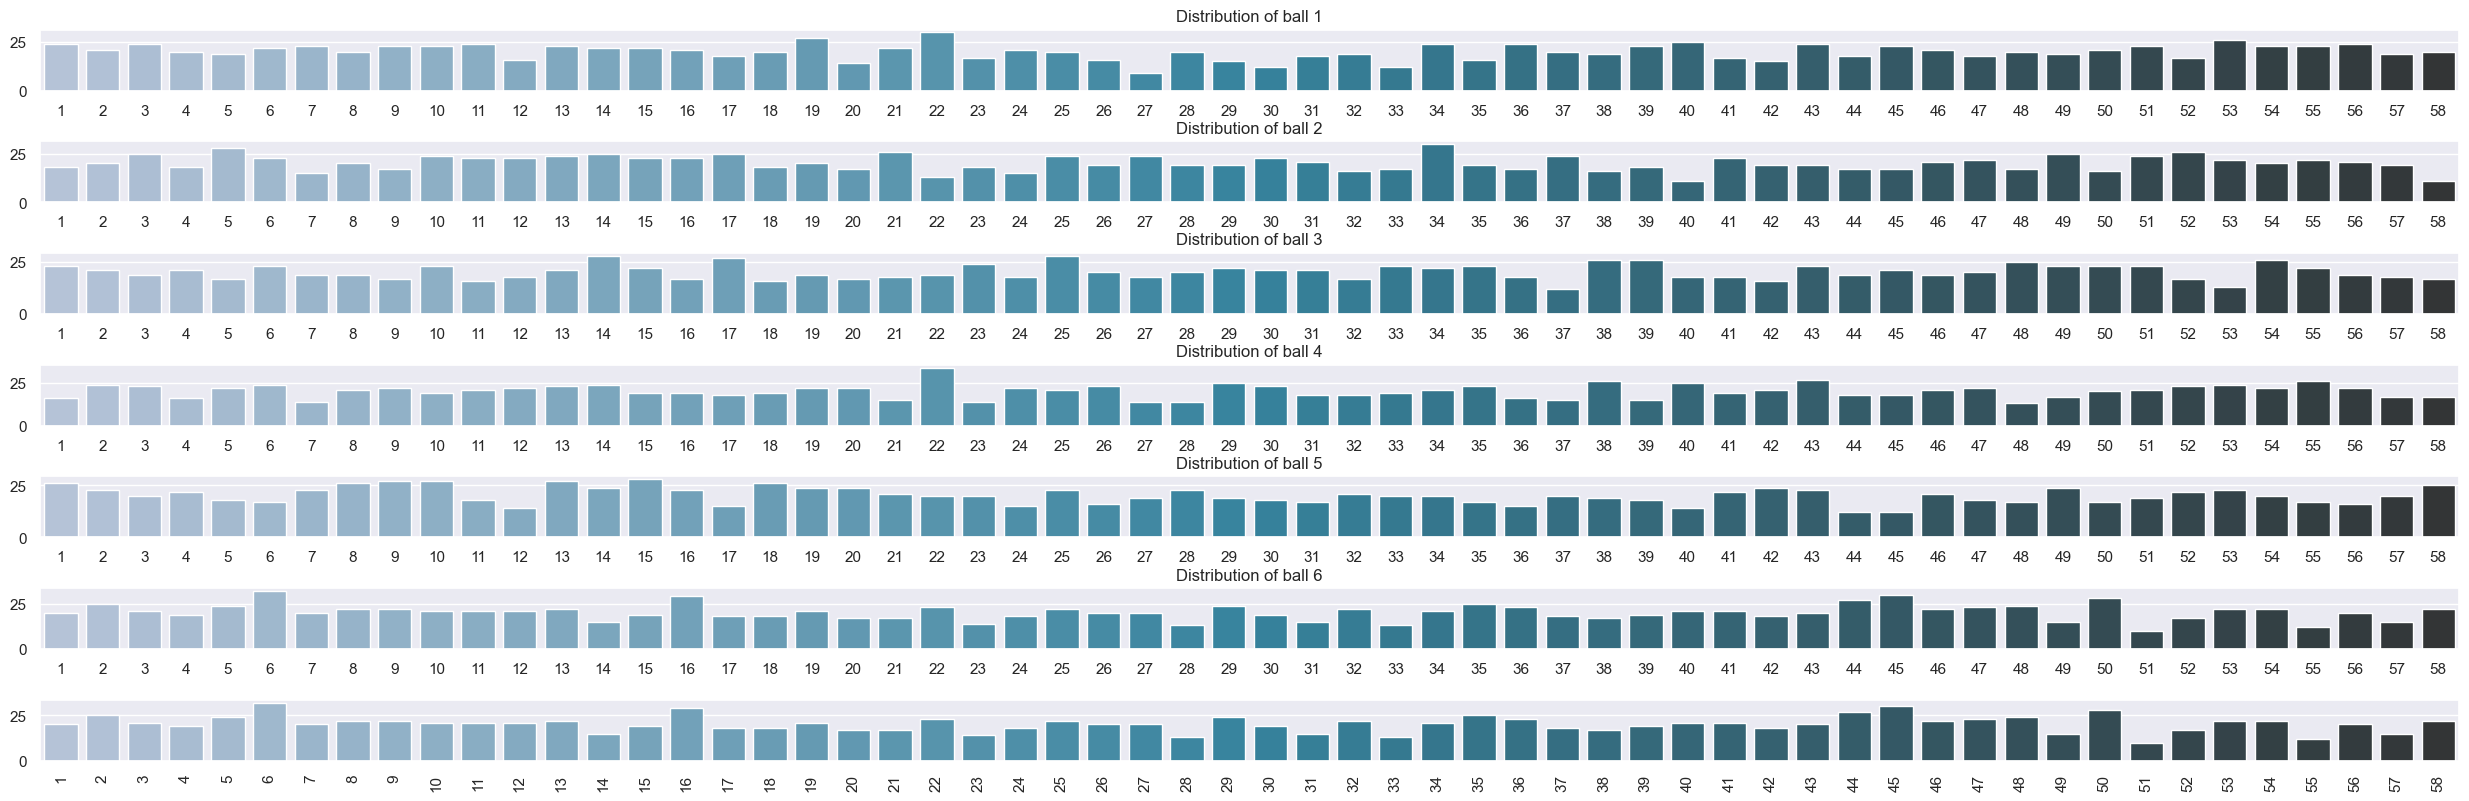

In [49]:
# Visualize the distributions of each ball
f, axes = plt.subplots(7, 1)
f.tight_layout() 
for i in range(1,7):
    ball_dist = ultralotto58['BALL ' +str(i)].value_counts().sort_index()
    axes[i-1].set_title('Distribution of ball '+str(i))
    plt.xticks(rotation=90)
    sns.barplot(x=ball_dist.keys(), y=ball_dist.values, ax=axes[i-1], palette="PuBuGn_d")

plt.xticks(rotation=90)
sns.barplot(x=ball_dist.keys(), y=ball_dist.values, ax=axes[6], palette="PuBuGn_d")

## Conclusion
Let's see if we have reached our objectives.

- **Learn what's the highest and lowest amount won by a player.**

The largest jackpot won was PHP 1,180,622,508.0 in the Ultra Lotto 6/58 game.

The lowest jackpot won was PHP 3,000,000.0 in the Lotto 6/42 game.

- **Determine the highest number of winning players.**

The highest number of winning players was **433 in the Grand Lotto 6/55** game. The winners had to share the Jackpot prize amounting to PHP 236,091,188.4. This meant that every player got to take home PHP 545,245.24.

When news broke out that 433 winners were going to split the PHP 236 million jackpot prize, it triggered a discussion in social media of whether the draw was rigged. PCSO assured the public by releasing a statement that said:

*“We would like to assure the public that the PCSO is honest about its responsibility and mandate to conduct games that are trustworthy, have integrity, utmost sincerity, and transparency,”*

The PCSO said the winning bettors were spread across the country. Around a third or 152 of them were in Metro Manila, 34 in Cavite, and 22 in Rizal.

View a Rappler news article about the incident here [433 Grand Lotto winners were ‘loyal’ to their numbers, says PCSO] (https://www.rappler.com/nation/pcso-says-grand-lotto-winners-october-1-2022-loyal-numbers/)

- **Determine if the PCSO Lottery is fair.**

PCSO prides themselves in their strict guidelines and process of drawing the winning combination. With two unbiased groups overseeing the process and the fact that the draw is broadcast via TV and online streaming, it is near impossible to cheat or rig the games.

In our mathematical analysis of the games, it is truly a gamble to play because there is an extremely low chance of winning the games. And for every ticket bought, the player automatically loses PHP 18 in net profit. 

During our analysis of the ball distribution of the games, we saw that the balls had an equal distribution and there were no balls that had a higher chance of being drawn. 

Based on the data we gathered, **the PCSO Lottery is fair.**

- **Know when is the best day to play and which game to join.**

Below is a table showing the total winners per day of the week:

| Sunday | Monday | Tuesday | Wednesday | Thursday | Friday | Saturday|
|---|---|---|---|---|---|---|
| 55 | 80 | 95 | 57 | 111 | 76 | 118 |

Therefore, the best days to play is Saturday and Thursday. The games that can be played on those days are Grand Lotto 6/55, Lotto 6/42, and Super Lotto 6/49.

The game with the most number of winners is Lotto 6/42 which has 212 winners, followed by Mega Lotto 6/45 which has 158 winners.

Based on all these information, **it is best to play Lotto 6/42 on a Saturday.**


## Recommendations
There are a few recommendations to further improve this study. 

- There are actually consolation prizes for players who matched 3 to 5 winning combinations and the prizes for such cases differ per game. In the lottery mathematics section, including the consolation prizes can alter the results of the net profit per game played.
- Because we analyzed 5 lottery games, the frequency distribution of the balls were biased on the number of games that can play it. To avoid the bias, it is possible to standardize the total number of data selected per game and conduct a study based on the standardized data. 
- A machine learning algorithm can be utilized to "predict" the winning lottery numbers.

## Extra
The bar graph showing the ball distribution in the Lotto 6/42 section is good for analysis, but it can be a little tricky to specify the numbers with the highest frequency of being drawn. In this section, let's list the 12 best numbers to play in the Lotto 6/42 game.

In [50]:
extra=lotto42[['BALL 1', 'BALL 2', 'BALL 3','BALL 4','BALL 5','BALL 6']].apply(pd.Series.value_counts)

extra1=['BALL 1','BALL 2', 'BALL 3','BALL 4','BALL 5','BALL 6']
extra['Total'] = extra[extra1].sum(axis=1)

In [51]:
extra2= extra.sort_values(by=['Total'], ascending=False)
extra2.head(12)

,BALL 1,BALL 2,BALL 3,BALL 4,BALL 5,BALL 6,Total
19,47,37,46,33,51,53,267
15,52,49,40,41,42,32,256
31,42,42,49,41,39,36,249
4,32,37,43,51,42,43,248
16,44,40,35,38,40,47,244
22,35,45,24,40,53,44,241
25,36,45,38,36,33,53,241
5,32,37,42,31,51,45,238
7,42,34,48,38,43,31,236
8,44,30,44,48,37,33,236


Based on the dataframe above, the best numbers to play on Lotto 6/42 are:
    
**19 , 15, 31, 4, 16, 22, 25, 5, 7, 8, 27, and 20**